# TP4 2004 - REGIÓN GBA.

## Base de datos del TP

In [2]:
!pip install pandas pyreadstat

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ------------------------------ --------- 1.8/2.4 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 9.0 MB/s eta 0:00:00


In [3]:
import ISLP
from ISLP import load_data
from statsmodels.datasets import get_rdataset


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
ruta1 = r"C:\Users\martz\Desktop\usu_individual_T104.dta"
with open(ruta1, 'rb') as file:
    df1 = pd.read_stata(file)
df1.head()

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000


In [8]:
# Filtramos por región igual a 'Gran Buenos Aires'
df1_gba = df1[df1['region'] == 'Gran Buenos Aires']

# Vemos las primeras filas del nuevo DataFrame filtrado
df1_gba.head()

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000


In [10]:
# Ponemos todos los nombres de categorias en minúsculas
df1_gba.columns = df1_gba.columns.str.lower()
df1_gba.columns

Index(['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)

In [12]:
# Homogeneizamos las bases

# ch03: Parentesco
df1_gba['ch03'] = df1_gba['ch03'].replace({
    1: 'Jefe/a',
    2: 'Cónyuge/pareja',
    3: 'Hijo / hijastro/a',
    4: 'Yerno / nuera',
    5: 'Nieto/a',
    6: 'Madre / padre',
    7: 'Suegro/a',
    8: 'Hermano/a',
    9: 'Otros familiares',
    10: 'No familiares'
})

# ch04: Sexo
df1_gba['ch04'] = df1_gba['ch04'].replace({
    1: 'Varón',
    2: 'Mujer'
})

# ch10: Asistencia escolar
df1_gba['ch10'] = df1_gba['ch10'].replace({
    1: 'Sí, asiste',
    2: 'No asiste, pero asistió',
    3: 'Nunca asistió'
})

# ch12: Nivel educativo
df1_gba['ch12'] = df1_gba['ch12'].replace({
    1: 'Jardín/preescolar',
    2: 'Primario',
    3: 'EGB',
    4: 'Secundario',
    5: 'Polimodal',
    6: 'Terciario',
    7: 'Universitario',
    8: 'Posgrado universitario',
    9: 'Educación especial (discapacitado)'
})

# ch13: Alfabetización
df1_gba['ch13'] = df1_gba['ch13'].replace({
    1: 'Sí',
    2: 'No',
    3: 'Ns/Nr'
})

# ch14: Año o grado
df1_gba['ch14'] = df1_gba['ch14'].replace({
    0: 'Ninguno',
    1: 'Primero',
    2: 'Segundo',
    3: 'Tercero',
    4: 'Cuarto',
    5: 'Quinto',
    6: 'Sexto',
    7: 'Séptimo',
    8: 'Octavo',
    9: 'Noveno',
    98: 'Educación especial',
    99: 'Ns/Nr'
})

# estado: Condición de actividad
df1_gba['estado'] = df1_gba['estado'].replace({
    0: 'Entrevista individual no realizada (no respuesta al cuestionario individual)',
    1: 'Ocupado',
    2: 'Desocupado',
    3: 'Inactivo',
    4: 'Menor de 10 años'
})



C:\Users\martz\AppData\Local\Temp\ipykernel_26460\354969261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_gba['ch03'] = df1_gba['ch03'].replace({
C:\Users\martz\AppData\Local\Temp\ipykernel_26460\354969261.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_gba['ch04'] = df1_gba['ch04'].replace({
C:\Users\martz\AppData\Local\Temp\ipykernel_26460\354969261.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [14]:
# Seleccionamos solo las columnas que queremos 
columns_to_keep = ['ano4', 'mas_500', 'ch03', 'ch04', 'ch06', 'ch10', 'ch12', 
                   'ch13', 'ch14', 'estado','p21', 'cat_ocup', 'pp03d']

# Aseguramos que ambas bases tengan solo las columnas necesarias
df1_filtered = df1_gba[columns_to_keep]

In [16]:
# Vemos los datos de la variable 'estado' en 2004
estado_data4 = df1_filtered['estado']

# Mostrar los datos
estado_data4.value_counts()

estado
Ocupado                                                         3079
Inactivo                                                        2800
Menor de 10 años                                                1230
Desocupado                                                       528
Entrevista individual no realizada (no respuesta al cuestion      10
Name: count, dtype: int64

In [18]:
# Creamos bases para los que respondieron en 2004
respondieron4 = df1_filtered[df1_filtered['estado'] != 'Entrevista individual no realizada (no respuesta al cuestion']
respondieron4.head(5)

,ano4,mas_500,ch03,ch04,ch06,ch10,ch12,ch13,ch14,estado,p21,cat_ocup,pp03d
0,2004.0,S,Jefe,Varón,79.0,"No asiste, pero asistió",Secundario,No,03,Inactivo,0.0,0.0,0.0
1,2004.0,S,Jefe,Mujer,67.0,"No asiste, pero asistió",Primario,Sí,,Ocupado,0.0,Cuenta propia,0.0
2,2004.0,S,Jefe,Mujer,74.0,"No asiste, pero asistió",Primario,Sí,,Inactivo,0.0,0.0,0.0
3,2004.0,S,Jefe,Varón,54.0,"No asiste, pero asistió",Primario,Sí,,Ocupado,2000.0,Cuenta propia,0.0
4,2004.0,S,Cónyuge/Pareja,Mujer,51.0,"No asiste, pero asistió",Universitario,Sí,,Inactivo,0.0,0.0,0.0


In [20]:
respondieron4 = respondieron4.copy()

# Ajustamos ingresos de 2004 a precios de 2024
respondieron4['p21_ajustado'] = respondieron4['p21'] * 1031.91

# Calculamos salario semanal suponiendo jornada completa (40 hs semanales)
respondieron4['salario_semanal'] = respondieron4['p21_ajustado'] / 40
respondieron4.head(5)

,ano4,mas_500,ch03,ch04,ch06,ch10,ch12,ch13,ch14,estado,p21,cat_ocup,pp03d,p21_ajustado,salario_semanal
0,2004.0,S,Jefe,Varón,79.0,"No asiste, pero asistió",Secundario,No,03,Inactivo,0.0,0.0,0.0,0.0,0.0
1,2004.0,S,Jefe,Mujer,67.0,"No asiste, pero asistió",Primario,Sí,,Ocupado,0.0,Cuenta propia,0.0,0.0,0.0
2,2004.0,S,Jefe,Mujer,74.0,"No asiste, pero asistió",Primario,Sí,,Inactivo,0.0,0.0,0.0,0.0,0.0
3,2004.0,S,Jefe,Varón,54.0,"No asiste, pero asistió",Primario,Sí,,Ocupado,2000.0,Cuenta propia,0.0,2063820.0,51595.5
4,2004.0,S,Cónyuge/Pareja,Mujer,51.0,"No asiste, pero asistió",Universitario,Sí,,Inactivo,0.0,0.0,0.0,0.0,0.0


In [22]:
respondieron4 = respondieron4.copy()
respondieron4['ch06'] = pd.to_numeric(respondieron4['ch06'], errors='coerce')
respondieron4['edad2'] = respondieron4['ch06'] ** 2
respondieron4['edad2']

0       6241.0
1       4489.0
2       5476.0
3       2916.0
4       2601.0
         ...  
7642       1.0
7643    2601.0
7644    3025.0
7645     144.0
7646     484.0
Name: edad2, Length: 7637, dtype: float64

In [24]:
# Diccionario base: años de educación si el nivel está COMPLETO
educacion_completa = {
    "Jardín/preescolar": 0,
    "Primario": 7,
    "EGB": 7,
    "Secundario": 13,       # 7 (primaria) + 6 (secundaria)
    "Polimodal": 13,        # Igual que secundario
    "Terciario": 16,        # 13 + 3
    "Universitario": 18,    # 13 + 5
    "Posgrado universitario": 20,  # 18 + 2
    "Educación especial (discapacitado)": np.nan
}

# Diccionario: cantidad de años aprobados si NO finalizó el nivel
anios_aprobados = {
    "Ninguno": 0,
    "Primero": 1,
    "Segundo": 2,
    "Tercero": 3,
    "Cuarto": 4,
    "Quinto": 5,
    "Sexto": 6,
    "Séptimo": 7,
    "Octavo": 8,
    "Noveno": 9,
    "Educación especial": np.nan,
    "Ns/Nr": np.nan
}

# Función para calcular los años de educación
def calcular_educ(row):
    nivel = row['ch12']
    finalizo = row['ch13']
    ultimo_anio = row['ch14']
    
    if nivel not in educacion_completa:
        return np.nan
    
    if finalizo == "Sí":
        return educacion_completa[nivel]
    else:
        if nivel in ["Primario", "EGB"]:
            base = 0
        elif nivel in ["Secundario", "Polimodal"]:
            base = 7
        elif nivel in ["Terciario", "Universitario"]:
            base = 13
        elif nivel == "Posgrado universitario":
            base = 18
        else:
            base = 0
        
        return base + anios_aprobados.get(ultimo_anio, np.nan)


respondieron4 = respondieron4.copy()

# Aplicamos la función
respondieron4['educ'] = respondieron4.apply(calcular_educ, axis=1)

# Mostramos la nueva variable (opcional)
respondieron4[['ch12', 'ch13', 'ch14', 'educ']].head(20)

,ch12,ch13,ch14,educ
0,Secundario,No,03,NaN
1,Primario,Sí,,7.0
2,Primario,Sí,,7.0
3,Primario,Sí,,7.0
4,Universitario,Sí,,18.0
5,Universitario,No,04,NaN
6,Terciario,No,02,NaN
7,Secundario,Sí,,13.0
8,Secundario,Sí,,13.0
9,Secundario,No,03,NaN


# Ejercicio A. Enfoque de validación


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [28]:
# Cambiamos el formato a la salida 
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# Inspección rápida de las variables y sus valores
respondieron4.describe()

,ano4,ch06,p21,pp03d,p21_ajustado,salario_semanal,edad2,educ
count,7637.00,7502.00,7637.00,7637.00,7637.00,7637.00,7502.00,3228.00
mean,2004.00,34.18,263.50,0.07,271909.43,6797.74,1672.14,10.97
std,0.00,22.44,823.19,0.39,849454.19,21236.35,1837.56,4.04
min,2004.00,1.00,0.00,0.00,0.00,0.00,1.00,7.00
25%,2004.00,15.00,0.00,0.00,0.00,0.00,225.00,7.00
50%,2004.00,30.00,0.00,0.00,0.00,0.00,900.00,13.00
75%,2004.00,51.00,350.00,0.00,361168.50,9029.21,2601.00,13.00
max,2004.00,96.00,54000.00,4.00,55723140.00,1393078.50,9216.00,18.00


In [30]:
# Crear la dummy 'estado_desocupado'
respondieron4['estado_desocupado'] = (respondieron4['estado'] == 'Desocupado').astype(int)
# Crear la dummy 'estado_ocupado'
respondieron4['estado_ocupado'] = (respondieron4['estado'] == 'Ocupado').astype(int)

# Verificamos cantidad de casos
print("Desocupados:", respondieron4['estado_desocupado'].sum())
print("Ocupados:", respondieron4['estado_ocupado'].sum())

Desocupados: 528
Ocupados: 3079


In [144]:
# Lista de variables categóricas para crear dummies
vars_categoricas = ['ch03', 'ch04', 'ch10', 'ch12', 'ch13']

# Generamos las dummies
respondieron4_dummies = pd.get_dummies(respondieron4, columns=vars_categoricas, prefix=vars_categoricas, drop_first=False)

# Identificamos las columnas nuevas
cols_dummies = [col for col in respondieron4_dummies.columns if any(col.startswith(var + '_') for var in vars_categoricas)]

# Convertimos solo esas columnas a enteros
respondieron4_dummies[cols_dummies] = respondieron4_dummies[cols_dummies].astype(int)

# Mostramos las primeras filas para verificar
respondieron4_dummies.head()

,ano4,mas_500,ch06,ch14,estado,p21,cat_ocup,pp03d,p21_ajustado,salario_semanal,...,ch12_Polimodal,ch12_Terciario,ch12_Universitario,ch12_Posgrado Universitario,ch12_Educación especial (discapacitado),ch12_Ns./Nr.,ch13_0.0,ch13_Sí,ch13_No,ch13_Ns./Nr.
0,2004.00,S,79.00,03,Inactivo,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,1,0
1,2004.00,S,67.00,,Ocupado,0.00,Cuenta propia,0.00,0.00,0.00,...,0,0,0,0,0,0,0,1,0,0
2,2004.00,S,74.00,,Inactivo,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,1,0,0
3,2004.00,S,54.00,,Ocupado,2000.00,Cuenta propia,0.00,2063820.00,51595.50,...,0,0,0,0,0,0,0,1,0,0
4,2004.00,S,51.00,,Inactivo,0.00,0.00,0.00,0.00,0.00,...,0,0,1,0,0,0,0,1,0,0


In [146]:
# Lista de columnas que queremos conservar
columnas_deseadas = [
    'ch06', 'salario_semanal', 'edad2', 'educ',
    'ch03_Jefe', 'ch03_Cónyuge/Pareja', 'ch03_Hijo/Hijastro', 'ch03_Yerno/Nuera',
    'ch03_Nieto', 'ch03_Madre/Padre', 'ch03_Suegro', 'ch03_Hermano',
    'ch03_Otros familiares', 'ch03_No familiares', 'ch04_Varón', 'ch04_Mujer',
    'ch10_Sí, asiste', 'ch10_No asiste, pero asistió', 'ch10_Nunca asistió', 'ch10_Ns./Nr.',
    'ch12_Jardín/Preescolar', 'ch12_Primario', 'ch12_EGB', 'ch12_Secundario', 'ch12_Polimodal',
    'ch12_Terciario', 'ch12_Universitario', 'ch12_Posgrado Universitario',
    'ch12_Educación especial (discapacitado)', 'ch12_Ns./Nr.',
    'ch13_Sí', 'ch13_No', 'ch13_Ns./Nr.', 'estado_desocupado', 'estado_ocupado'
]

# Creamos la nueva base con solo esas columnas
respondieron4_f = respondieron4_dummies[columnas_deseadas].copy()

# Mostramos las primeras filas para verificar
respondieron4_f.head()

,ch06,salario_semanal,edad2,educ,ch03_Jefe,ch03_Cónyuge/Pareja,ch03_Hijo/Hijastro,ch03_Yerno/Nuera,ch03_Nieto,ch03_Madre/Padre,...,ch12_Terciario,ch12_Universitario,ch12_Posgrado Universitario,ch12_Educación especial (discapacitado),ch12_Ns./Nr.,ch13_Sí,ch13_No,ch13_Ns./Nr.,estado_desocupado,estado_ocupado
0,79.00,0.00,6241.00,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,67.00,0.00,4489.00,7.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,74.00,0.00,5476.00,7.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,54.00,51595.50,2916.00,7.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,51.00,0.00,2601.00,18.00,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [148]:
#Sacamos las filas que tienen NaN para poder ajustar el modelo

respondieron4_f = respondieron4_f.dropna()

In [150]:
# Variable dependiente
y4 = respondieron4_f['estado_desocupado']

# Todas las columnas menos la variable dependiente
X4 = respondieron4_f.drop(columns='estado_desocupado')


In [152]:
# División de la base 2004
X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4, y4,
    test_size=0.3,           # 30% para test, 70% para entrenamiento
    random_state=444         # semilla para reproducibilidad
)


In [154]:
# Instanciamos el modelo
modelo4_logit = LogisticRegression(max_iter=1000)  

# Ajustamos el modelo con los datos de entrenamiento
modelo4_logit.fit(X4_train, y4_train)

C:\Users\martz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [156]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    classification_report
)

# Predicciones
y4_pred = modelo4_logit.predict(X4_test)
y4_proba = modelo4_logit.predict_proba(X4_test)[:, 1] 

# Métricas básicas con 3 decimales
print("Accuracy:", round(accuracy_score(y4_test, y4_pred), 3))
print("Precision:", round(precision_score(y4_test, y4_pred), 3))
print("Recall:", round(recall_score(y4_test, y4_pred), 3))
print("F1-score:", round(f1_score(y4_test, y4_pred), 3))
print("ROC AUC:", round(roc_auc_score(y4_test, y4_proba), 3))


Accuracy: 0.93
Precision: 0.695
Recall: 0.451
F1-score: 0.547
ROC AUC: 0.945



Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       877
           1       0.69      0.45      0.55        91

    accuracy                           0.93       968
   macro avg       0.82      0.72      0.75       968
weighted avg       0.92      0.93      0.92       968



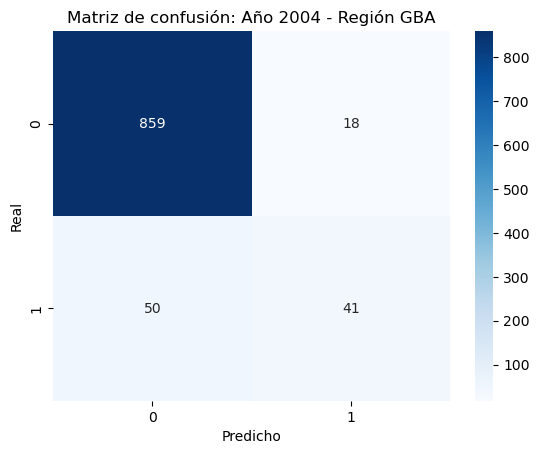

In [158]:
# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(y4_test, y4_pred))

# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

cm4 = confusion_matrix(y4_test, y4_pred)
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión: Año 2004 - Región GBA")
plt.show()


In [54]:
# Mostramos los coeficientes con sus nombres
coeficientes4 = pd.Series(modelo4_logit.coef_[0], index=X4.columns)
coeficientes4.sort_values(ascending=False)

ch03_Hermano                               0.55
ch03_Nieto                                 0.50
ch04_Varón                                 0.40
ch03_Hijo/Hijastro                         0.34
ch03_Jefe                                  0.34
ch12_EGB                                   0.30
ch03_No familiares                         0.21
ch12_Universitario                         0.20
ch06                                       0.16
ch12_Terciario                             0.10
ch10_Sí, asiste                            0.00
ch12_Educación especial (discapacitado)    0.00
ch12_Jardín/Preescolar                     0.00
ch10_Ns./Nr.                               0.00
ch10_Nunca asistió                         0.00
ch13_No                                    0.00
ch12_Ns./Nr.                               0.00
ch12_Posgrado Universitario                0.00
ch13_Ns./Nr.                               0.00
edad2                                     -0.00
ch12_Secundario                         

In [56]:
# Creamos variable dependiente: 1 si está desocupado, 0 en caso contrario
respondieron4['desocupado'] = (respondieron4['estado'] == 'Desocupado').astype(int)

# Seleccionamos variables independientes: todas menos 'estado' y 'desocupado'
X4 = respondieron4.drop(columns=['estado', 'desocupado'])
y4 = respondieron4['desocupado']

# Dividimos la muestra: 70% entrenamiento, 30% prueba — semilla 444
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, 
                                                    test_size=0.3, 
                                                    random_state=444)


print(f"X4_train: {X4_train.shape}, X4_test: {X4_test.shape}")
print(f"y4_train: {y4_train.shape}, y4_test: {y4_test.shape}")

X4_train: (5345, 18), X4_test: (2292, 18)
y4_train: (5345,), y4_test: (2292,)


In [58]:
# Calculamos las medias en cada conjunto
mean_train4 = X4_train.mean(numeric_only=True)
mean_test4 = X4_test.mean(numeric_only=True)

# Calculamos la diferencia de medias
diff_means4 = mean_train4 - mean_test4

# Creamos un DataFrame con los resultados
tabla_dif_medias4 = pd.DataFrame({
    'Media Train': mean_train4,
    'Media Test': mean_test4,
    'Diferencia': diff_means4
})


tabla_dif_medias4

,Media Train,Media Test,Diferencia
ano4,2004.00,2004.00,0.00
ch06,34.03,34.55,-0.53
p21,255.46,282.25,-26.78
pp03d,0.07,0.07,0.00
p21_ajustado,263614.30,291253.90,-27639.60
salario_semanal,6590.36,7281.35,-690.99
edad2,1657.88,1705.35,-47.46
educ,10.96,10.98,-0.02
estado_desocupado,0.07,0.06,0.01
estado_ocupado,0.41,0.40,0.01


# Ejercicio B.	Metodo Supervisado 1: Modelo de Regresión Lineal

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [62]:
# Creamos la dummy de cat_ocup que usaremos en el punto V
respondieron4['cat_ocup_obrero_empleado'] = (respondieron4['cat_ocup'] == 'Obrero o empleado').astype(int)

# Extraemos las columnas relevantes
extras = respondieron4[['pp03d', 'cat_ocup_obrero_empleado']]

# Añadimos estas columnas a respondieron4_f
respondieron4_f[['pp03d', 'cat_ocup_obrero_empleado']] = extras


In [64]:
# Filtramos solo ocupados 
ocupados4 = respondieron4_f[respondieron4_f['estado_ocupado'] == 1]

## I.'salario_semanal' con 'ch06' (edad) año 2004

In [66]:
# Seleccionamos variables
x4b = ocupados4['ch06'].values.reshape(-1, 1)  # Predictor
y4b = ocupados4['salario_semanal'].values      # Variable dependiente

In [68]:
# Dividimos datos en entrenamiento y prueba (70% train, 30% test)
x4b_train, x4b_test, y4b_train, y4b_test = train_test_split(x4b, y4b, test_size=0.3, random_state=444)

# Ajustamos el modelo con los datos de entrenamiento
model4b = LinearRegression().fit(x4b_train, y4b_train)

In [70]:
# Resultados del modelo
intercepto = model4b.intercept_
pendiente = model4b.coef_[0]

print('\nIntercepto:', round(intercepto,3))
print('Pendiente:', round(pendiente,3))


Intercepto: 10045.767
Pendiente: 228.743


In [72]:
# Predicciones en el set de test
y4b_pred = model4b.predict(x4b_test)

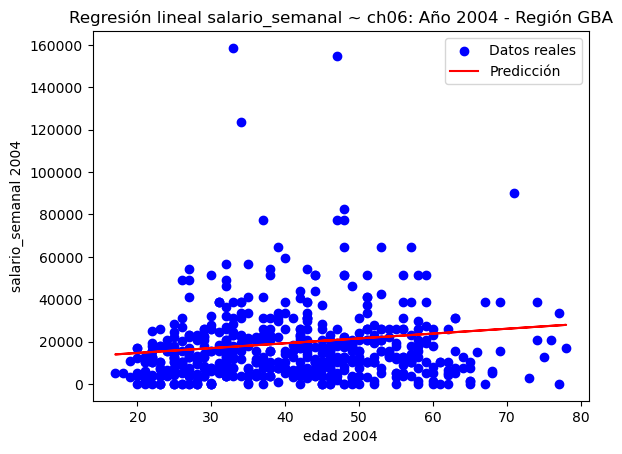

In [160]:
# Plot (scatter y línea de regresión)
plt.scatter(x4b_test, y4b_test, color='blue', label='Datos reales')
plt.plot(x4b_test, y4b_pred, color='red', label='Predicción')
plt.xlabel('edad 2004')
plt.ylabel('salario_semanal 2004')
plt.title('Regresión lineal salario_semanal ~ ch06: Año 2004 - Región GBA')
plt.legend()
plt.show()

In [76]:
# Métricas
r2_4b_train = model4b.score(x4b_train, y4b_train)
r2_4b_test = r2_score(y4b_test, y4b_pred)

print('\nR2 en entrenamiento:', round(r2_4b_train,3))
print('R2 en test:', round(r2_4b_test,3))


R2 en entrenamiento: 0.005
R2 en test: -0.013


## II.'salario_semanal' con 'ch06' y 'edad2' (edad y edad al cuadrado) año 2004

In [78]:
# Seleccionamos variables
X4c = ocupados4[['ch06', 'edad2']].values       # Predictoras
y4c = ocupados4['salario_semanal'].values       # Variable dependiente

In [80]:
# División de los datos en entrenamiento y prueba (70%-30%)
X4c_train, X4c_test, y4c_train, y4c_test = train_test_split(X4c, y4c, test_size=0.3, random_state=444)

# Ajustamos el modelo lineal
model4c = LinearRegression().fit(X4c_train, y4c_train)

In [82]:
# Resultados del modelo
intercepto = model4c.intercept_
pendientes = model4c.coef_

print('\nIntercepto:', round(intercepto,3))
print('Pendientes:')
print('  ch06:', round(pendientes[0],3))
print('  edad2:', round(pendientes[1],3))



Intercepto: -28363.447
Pendientes:
  ch06: 2189.08
  edad2: -22.644


In [84]:
# Predicciones sobre el set de test
y4c_pred = model4c.predict(X4c_test)

In [86]:
# Métricas de desempeño
r2_4c_train = model4c.score(X4c_train, y4c_train)
r2_4c_test = r2_score(y4c_test, y4c_pred)

print('\nR2 en entrenamiento:', round(r2_4c_train,3))
print('R2 en test:', round(r2_4c_test,3))


R2 en entrenamiento: 0.015
R2 en test: -0.015


## III.'salario_semanal' con 'ch06', 'edad2' y 'educ' (edad, edad al cuadrado y educación) año 2004

In [88]:
# Seleccionamos las variables
X4d = ocupados4[['ch06', 'edad2', 'educ']].values  # Predictoras
y4d = ocupados4['salario_semanal'].values          # Variable dependiente

In [90]:
# División en entrenamiento y prueba (70%-30%)
X4d_train, X4d_test, y4d_train, y4d_test = train_test_split(X4d, y4d, test_size=0.3, random_state=444)

# Ajuste del modelo
model4d = LinearRegression().fit(X4d_train, y4d_train)

In [92]:
# Resultados del modelo
intercepto = model4d.intercept_
pendientes = model4d.coef_

print('\nIntercepto:', round(intercepto,3))
print('Pendientes:')
print('  ch06:', round(pendientes[0],3))
print('  edad2:', round(pendientes[1],3))
print('  educ:', round(pendientes[2],3))


Intercepto: -48760.201
Pendientes:
  ch06: 1839.308
  edad2: -18.098
  educ: 2257.449


In [94]:
# Predicciones sobre el set de test
y4d_pred = model4d.predict(X4d_test)

In [96]:
# Métricas de desempeño
r2_4d_train = model4d.score(X4d_train, y4d_train)
r2_4d_test = r2_score(y4d_test, y4d_pred)

print('\nR2 en entrenamiento:', round(r2_4d_train,3))
print('R2 en test:', round(r2_4d_test,3))


R2 en entrenamiento: 0.062
R2 en test: 0.103


## IV.'salario_semanal' con 'ch06', 'edad2', 'educ' y 'ch04_Mujer' (edad, edad al cuadrado, educación y género) año 2004

In [98]:
# Selección de variables
X4e = ocupados4[['ch06', 'edad2', 'educ', 'ch04_Mujer']].values  # Predictoras
y4e = ocupados4['salario_semanal'].values                        # Variable dependiente

In [100]:
# División en conjunto de entrenamiento y test (70% - 30%)
X4e_train, X4e_test, y4e_train, y4e_test = train_test_split(X4e, y4e, test_size=0.3, random_state=444)

# Ajuste del modelo
model4e = LinearRegression().fit(X4e_train, y4e_train)

In [102]:
# Resultados
intercepto = model4e.intercept_
pendientes = model4e.coef_

print('\nIntercepto:', round(intercepto,3))
print('Pendientes:')
print('  ch06:', round(pendientes[0],3))
print('  edad2:', round(pendientes[1],3))
print('  educ:', round(pendientes[2],3))
print('  ch04_Mujer:', round(pendientes[3],3))



Intercepto: -49107.469
Pendientes:
  ch06: 1988.343
  edad2: -19.718
  educ: 2385.458
  ch04_Mujer: -10111.051


In [104]:
# Predicciones sobre el set de test
y4e_pred = model4e.predict(X4e_test)


In [106]:
# Métricas R2
r2_4e_train = model4e.score(X4e_train, y4e_train)
r2_4e_test = r2_score(y4e_test, y4e_pred)

print('\nR2 en entrenamiento:', round(r2_4e_train,3))
print('R2 en test:', round(r2_4e_test,3))


R2 en entrenamiento: 0.076
R2 en test: 0.172


## IV.'salario_semanal' con 'ch06', 'edad2', 'educ', 'ch04_Mujer', 'pp03d' y 'cat_ocup_obrero_empleado'  (edad, edad al cuadrado, educación, género, cuántas ocupaciones tiene y si es obrero/empleado) año 2004

In [108]:
# Selección de variables 
X4f = ocupados4[['ch06', 'edad2', 'educ', 'ch04_Mujer', 'pp03d', 'cat_ocup_obrero_empleado']].values # Predictoras
y4f = ocupados4['salario_semanal'].values  # Variable dependiente

In [110]:
# División en conjunto de entrenamiento y test (70% - 30%)
X4f_train, X4f_test, y4f_train, y4f_test = train_test_split(X4f, y4f, test_size=0.3, random_state=444)

# Ajuste del modelo
model4f = LinearRegression().fit(X4f_train, y4f_train)

In [112]:
# Resultados
intercepto = model4f.intercept_
pendientes = model4f.coef_

print('\nIntercepto:', round(intercepto,3))
print('Pendientes:')
print('  ch06:', round(pendientes[0],3))
print('  edad2:', round(pendientes[1],3))
print('  educ:', round(pendientes[2],3))
print('  ch04_Mujer:', round(pendientes[3],3))
print('  pp03d:', round(pendientes[4],3))
print('  cat_ocup_obrero_empleado:', round(pendientes[5],3))


Intercepto: -55158.379
Pendientes:
  ch06: 2068.735
  edad2: -20.26
  educ: 2449.872
  ch04_Mujer: -10385.397
  pp03d: -3297.703
  cat_ocup_obrero_empleado: 5010.905


In [114]:
# Predicciones sobre el set de test
y4f_pred = model4f.predict(X4f_test)


In [370]:
# Métricas R2
r2_4f_train = model4f.score(X4f_train, y4f_train)
r2_4f_test = r2_score(y4f_test, y4f_pred)

print('\nR2 en entrenamiento:', round(r2_4f_train,3))
print('R2 en test:', round(r2_4f_test,3))


R2 en entrenamiento: 0.08
R2 en test: 0.176


## Tabla 2. Estimación por regresión lineal de salarios usando la base de entrenamiento 

In [134]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Definimos las variables para cada modelo
variables_modelos = [
    ['ch06'],  # Modelo 1
    ['ch06', 'edad2'],  # Modelo 2
    ['ch06', 'edad2', 'educ'],  # Modelo 3
    ['ch06', 'edad2', 'educ', 'ch04_Mujer'],  # Modelo 4
    ['ch06', 'edad2', 'educ', 'ch04_Mujer', 'pp03d', 'cat_ocup_obrero_empleado']  # Modelo 5
]

# Nombres visibles de las variables
nombres_visibles = {
    'ch06': 'edad',
    'edad2': 'edad2',
    'educ': 'educ',
    'ch04_Mujer': 'Mujer',
    'pp03d': 'Variable 1',
    'cat_ocup_obrero_empleado': 'Variable 2'
}

# Guardamos resultados
modelos = []
columnas = ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5']
index = list(nombres_visibles.values())
tabla = pd.DataFrame(index=index, columns=columnas)

# Recorremos cada modelo
for i, vars_modelo in enumerate(variables_modelos):
    X = ocupados4[vars_modelo]
    y = ocupados4['salario_semanal']

    # División en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=444)
    X_train_const = sm.add_constant(X_train)
    
    modelo = sm.OLS(y_train, X_train_const).fit()
    modelos.append(modelo)

    for var in nombres_visibles:
        if var in vars_modelo:
            coef = modelo.params[var]
            se = modelo.bse[var]
            pval = modelo.pvalues[var]

            # Significancia
            signif = ""
            if pval < 0.001:
                signif = "***"
            elif pval < 0.05:
                signif = "**"
            elif pval < 0.1:
                signif = "*"

            texto = f"{coef:.3f}{signif} ({se:.2f})"
            tabla.loc[nombres_visibles[var], columnas[i]] = texto
        else:
            tabla.loc[nombres_visibles[var], columnas[i]] = ""

# Agregar N y R2
tabla.loc["N (obs)"] = [int(model.nobs) for model in modelos]
tabla.loc["R²"] = [f"{model.rsquared:.3f}" for model in modelos]

# Mostrar tabla final
tabla
# Exportamos el DataFrame como archivo Excel
ocupados4.to_excel("ocupados_2004_TP4.xlsx", index=False)

## 3-) Performance por regresión lineal de la predicción de salarios usando la base de testeo.

In [136]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Cargamos la base de ocupados del año 2004
df_2004 = pd.read_excel("ocupados_2004_TP4.xlsx")

# Definimos las variables para cada modelo
variables_modelos = [
    ['ch06'],  # Modelo 1
    ['ch06', 'edad2'],  # Modelo 2
    ['ch06', 'edad2', 'educ'],  # Modelo 3
    ['ch06', 'edad2', 'educ', 'ch04_Mujer'],  # Modelo 4
    ['ch06', 'edad2', 'educ', 'ch04_Mujer', 'pp03d', 'cat_ocup_obrero_empleado']  # Modelo 5
]

# Creamos un diccionario para guardar las métricas de cada modelo
resultados = {
    "Modelo": [],
    "MSE": [],
    "RMSE": [],
    "MAE": []
}

# Recorremos los modelos y calculamos métricas
for i, variables in enumerate(variables_modelos):
    df_modelo = df_2004[variables + ["salario_semanal"]].dropna()
    
    X = df_modelo[variables]
    y = df_modelo["salario_semanal"]
    X = sm.add_constant(X)

    # Dividimos en entrenamiento y testeo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=444)

    # Ajustamos el modelo
    modelo = sm.OLS(y_train, X_train).fit()
    y_pred = modelo.predict(X_test)

    # Calculamos las métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    # Guardamos resultados
    resultados["Modelo"].append(f"Modelo {i+1}")
    resultados["MSE"].append(mse)
    resultados["RMSE"].append(rmse)
    resultados["MAE"].append(mae)

# Mostramos los resultados en una tabla
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

     Modelo          MSE     RMSE      MAE
0  Modelo 1 297224206.62 17240.19 11907.85
1  Modelo 2 297673888.42 17253.23 12055.71
2  Modelo 3 263255679.08 16225.16 11208.96
3  Modelo 4 243063144.83 15590.48 10737.01
4  Modelo 5 241699046.51 15546.67 10685.53


## 4-) Predicción de salarios en un gráfico de dispersión.

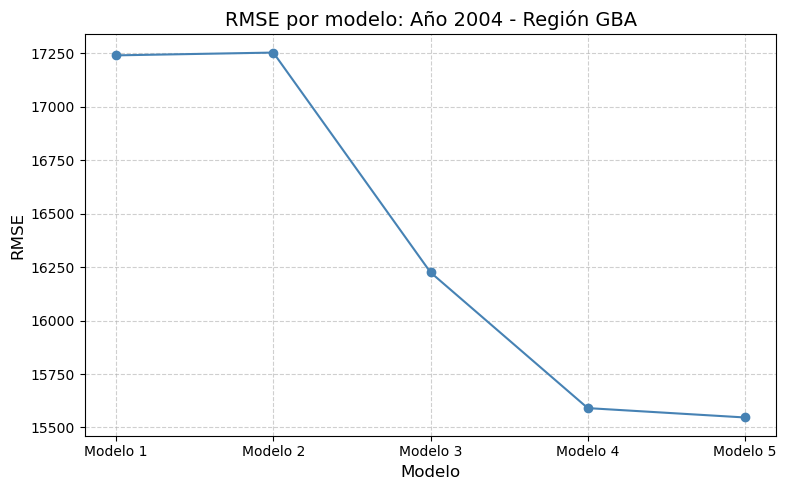

In [140]:
import matplotlib.pyplot as plt
import pandas as pd

# Gráfico para 2004 
plt.figure(figsize=(8, 5))
plt.plot(df_resultados["Modelo"], df_resultados["RMSE"], marker='o', color='steelblue')
plt.title("RMSE por modelo: Año 2004 - Región GBA", fontsize=14)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## C. Métodos de Clasificación y Performance


### 5-) Regresión logistica (logit) y Vecinos cercanos (KNN)

In [476]:
#Convertimos a binario: 1 si está desocupado, 0 si no.
y_train_bin = (y_train > 0.5).astype(int)
y_test_bin = (y_test > 0.5).astype(int)


In [478]:
from sklearn.neighbors import KNeighborsClassifier

#Definir el modelo KNN con K=5.
knn_model = KNeighborsClassifier(n_neighbors=5)

#Entrenar el modelo.
knn_model.fit(X_train, y_train_bin)
knn_probs = knn_model.predict_proba(X_test)[:, 1]
knn_preds = (knn_probs > 0.5).astype(int)


In [480]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#Escalamos los datos.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Entrenamos el modelo logístico.
logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train_scaled, y_train_bin)

#Predicciones con datos escalados.
logit_probs = logit_model.predict_proba(X_test_scaled)[:, 1]
logit_preds = (logit_probs > 0.5).astype(int)

#Igual para KNN (también con datos escalados si es necesario).
knn_model.fit(X_train_scaled, y_train_bin)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]
knn_preds = (knn_probs > 0.5).astype(int)


In [482]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, RocCurveDisplay
import matplotlib.pyplot as plt
#Ahora con esto podremos ver la precisión.
def evaluar_modelo(y_true, y_pred, y_prob, nombre):
    print(f"\n--- {nombre} ---")
    print("Matriz de confusión:")
    print(confusion_matrix(y_true, y_pred))
    
    acc = accuracy_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=nombre).plot()
    plt.title(f"ROC Curve - {nombre}: Año 2004 - Región GBA")
    plt.show()



--- Regresión Logística ---
Matriz de confusión:
[[  0  41]
 [  0 529]]
Accuracy: 0.9281
AUC: 0.6822


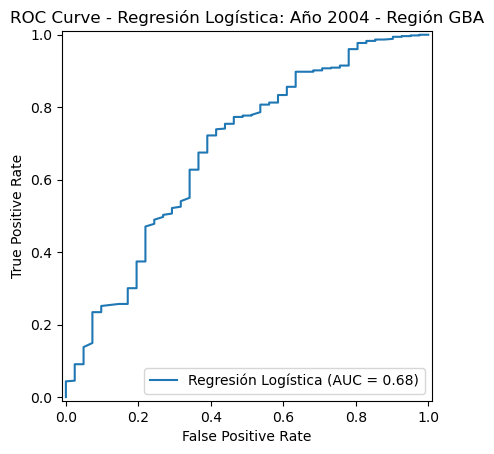


--- KNN (K=5) ---
Matriz de confusión:
[[  2  39]
 [  7 522]]
Accuracy: 0.9193
AUC: 0.5441


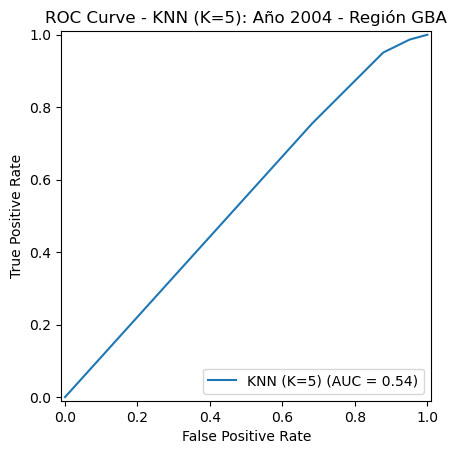

In [484]:
evaluar_modelo(y_test_bin, logit_preds, logit_probs, "Regresión Logística")
evaluar_modelo(y_test_bin, knn_preds, knn_probs, "KNN (K=5)")


### 6-) Personas que son desocupadas dentro de la base norespondieron. 

In [411]:
if 'desocupado' not in df1_gba.columns:
    df1_gba['desocupado'] = df1_gba['estado'] == 'Desocupado'


In [413]:
from sklearn.linear_model import LogisticRegression

# Filtrar solo filas sin nulos en las variables del modelo
df_modelo = df1_gba.dropna(subset=columnas_usadas + ['desocupado'])

# Separar X e y
X_train = df_modelo[columnas_usadas]
y_train = df_modelo['desocupado']  # Asegurate que esta columna exista y tenga valores 0/1

# Entrenar el modelo de regresión logística
modelo_logit = LogisticRegression(max_iter=1000)
modelo_logit.fit(X_train, y_train)

print("✅ Modelo de regresión logística entrenado.")


✅ Modelo de regresión logística entrenado.


In [417]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Asegurarse de que la variable 'desocupado' esté definida
if 'desocupado' not in df1_gba.columns:
    df1_gba['desocupado'] = df1_gba['ESTADO'] == 'Desocupado'

# Crear variables necesarias si no existen
if 'edad2' not in df1_gba.columns:
    df1_gba['edad2'] = pd.to_numeric(df1_gba['ch06'], errors='coerce') ** 2
if 'ch04_Mujer' not in df1_gba.columns and 'ch04' in df1_gba.columns:
    df1_gba['ch04_Mujer'] = df1_gba['ch04'] == 2

# Asegurar que las variables categóricas estén codificadas
for col in ['educ', 'cat_ocup_obrero_empleado']:
    if df1_gba[col].dtype.name == 'category':
        df1_gba[col] = df1_gba[col].astype(str)
    if df1_gba[col].dtype == object:
        df1_gba[col] = LabelEncoder().fit_transform(df1_gba[col].astype(str))

# Columnas a usar
columnas_usadas = ['ch06', 'edad2', 'educ', 'ch04_Mujer', 'pp03d', 'cat_ocup_obrero_empleado']

# Entrenar modelo
df_entrena = df1_gba.dropna(subset=columnas_usadas + ['desocupado'])
X_train = df_entrena[columnas_usadas]
y_train = df_entrena['desocupado']
modelo_logit = LogisticRegression(max_iter=1000)
modelo_logit.fit(X_train, y_train)

# Filtrar no respondieron
norespondieron = df1_gba[df1_gba[columnas_usadas].isnull().any(axis=1)].copy()

# Filtrar los que sí tienen suficientes datos para predecir
X_noresp = norespondieron[columnas_usadas].dropna()

# Verificar si hay datos para predecir
if len(X_noresp) > 0:
    y_pred_noresp = modelo_logit.predict(X_noresp)
    norespondieron.loc[X_noresp.index, 'pred_desocupado'] = y_pred_noresp

    # Calcular proporción de predichos como desocupados
    proporcion_desocupados = y_pred_noresp.mean()
    print(f"Proporción de personas no respondientes predichas como desocupadas: {proporcion_desocupados:.2%}")
else:
    print("⚠️ No hay suficientes datos completos en 'norespondieron' para realizar predicciones.")


⚠️ No hay suficientes datos completos en 'norespondieron' para realizar predicciones.
